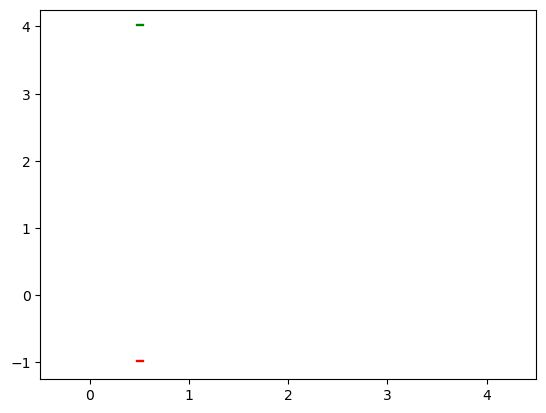

In [16]:
"""
NQLL-p
N-queens linked lists python version
Dr Keith Reid
Coding Club
Jan 2024
"""

import numpy as np
import matplotlib.pyplot as plt

class Config:
    def __init__(self, n):
        self.n = n

class Node:
    def __init__(self, x, y, prev, succ, flavour):        
        self.x          = x
        self.y          = y
        self.prev       = prev
        self.succ       = succ
        self.flavour    = flavour

def get_n():
    n = 4
    return n

def get_config():
    n      = get_n()
    config = Config(n)
    return config

def init_dyad():
    config   = get_config()
    n        = config.n
    # name     type  x    y   prev   succ   flav
    alpha    = Node(0.5, -1, 'before',  None,   'A')
    omega    = Node(0.5,  n,  None,   'after',  'O')
    alpha.succ = omega
    omega.prev = alpha
    dyad       = [alpha, omega]
    return dyad

def draw(nodes):
    config = get_config()
    n      = config.n
    xs = [n.x for n in nodes if n.flavour=='A']
    ys = [n.y for n in nodes if n.flavour=='A']
    plt.scatter(xs, ys, c='red', marker="$-$")
    xs = [n.x for n in nodes if n.flavour=='O']
    ys = [n.y for n in nodes if n.flavour=='O']
    plt.scatter(xs, ys, c='green', marker="$-$")
    plt.xlim([-0.5, n+0.5])
    plt.show()
    
if __name__=="__main__":
    config       = get_config()
    dyad         = init_alpha_omega()
    draw(dyad)
    
    

In [17]:
def read_node_path(this_node):
    path           = []
    this_node_xy   = [this_node.x, this_node.y]
    path.append(this_node_xy)
    while this_node.succ != 'after':
        next_node = this_node.succ
        next_x    = next_node.x
        next_y    = next_node.y
        next_xy   = [next_x, next_y]
        path.append(next_xy)
        this_node = next_node
    return path
    

In [18]:
def test_init_dyad():
    dyad = init_dyad()
    alpha = dyad[0]
    omega = dyad[1]
    assert isinstance(dyad, list)
    assert isinstance(alpha, Node)
    assert isinstance(omega, Node)
    assert alpha != omega
    assert alpha.flavour == 'A'
    assert omega.flavour == 'O'
    assert alpha.x == 0.5
    assert alpha.y == -1
    assert alpha.succ == omega
    assert omega.prev == alpha
    assert omega.x    == alpha.x
    assert omega.y > alpha.y
    print("Passed init alpha omega")

def tests():
    test_init_dyad()
    print("Passed all tests")
    
tests()

Passed init alpha omega
Passed all tests


In [22]:
    
def test_read_node_path():
    n        = 4
    dyad     = init_dyad()
    alpha    = dyad[0]
    path     = read_node_path(alpha)
    assert path[0] == [0.5,-1]
    assert path[1][0] == 0.5
    
    n            = 4
    dyad         = init_dyad()
    alpha        = dyad[0]
    omega        = dyad[1]
    beta         = Node(0, 0, alpha, omega, 'Q')
    alpha.succ   = beta
    omega.prev   = beta
    path         = read_node_path(alpha)
    assert path == [[0.5, -1], [0, 0], [0.5, 4]]
    
    n            = 4
    dyad         = init_dyad()
    alpha        = dyad[0]
    omega        = dyad[1]
    beta         = Node(1, 1, alpha, omega, 'Q')
    alpha.succ   = beta
    omega.prev   = beta
    path         = read_node_path(alpha)
    assert path == [[0.5, -1], [1, 1], [0.5, 4]]
    
    print("Passed read path from node")
    
test_read_node_path()

Passed read path from node
